## Task 1 
Generate a time series plot of the monthly concentration of atmospheric carbon dioxide. Based on the time series plot, answer the following questions:
* Is the time series stationary?
* Are there any notable trends?
* Are there any cyclical behaviors?
* Is there any heteroscedasticity?


In [1]:
##packeges
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import matplotlib.dates as mdates
import seaborn as sns

In [2]:
#### Load Data #####
df = pd.read_csv('/Users/lihong/Desktop/ats_proj_submit_code/co2.csv')

In [ ]:
### set plot details 

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 8)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 6
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 10

In [ ]:
# preprocessing of data
# transform decimal year to datetime
def decimal_year_to_date(decimal_year):
    year = int(decimal_year)
    remainder = decimal_year - year
    year_start = pd.Timestamp(year=year, month=1, day=1)
    year_end = pd.Timestamp(year=year+1, month=1, day=1)
    return year_start + (year_end - year_start) * remainder

df['date'] = df['time(co2)'].apply(decimal_year_to_date)
df['co2'] = pd.to_numeric(df['co2'], errors='coerce')


In [8]:
## set date as index
df.set_index('date', inplace=True)

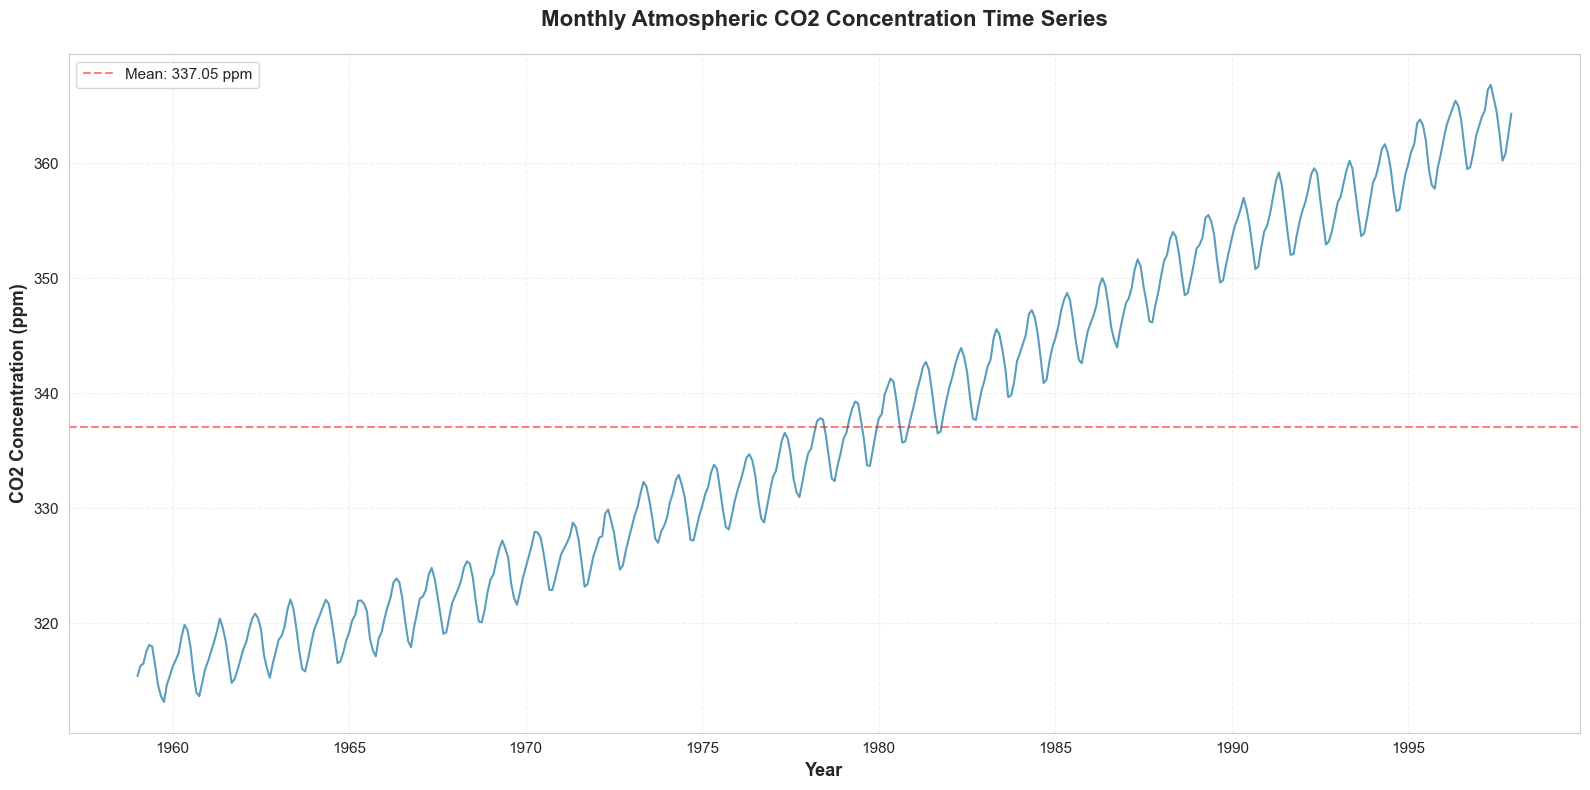

In [20]:
# 3. time series plot 
fig, ax = plt.subplots(figsize=(16, 8))
# main time series plot
ax.plot(df.index, df['co2'], linewidth=1.5, color='#2E86AB', alpha=0.8)
ax.set_title('Monthly Atmospheric CO2 Concentration Time Series', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Year', fontsize=13, fontweight='bold')
ax.set_ylabel('CO2 Concentration (ppm)', fontsize=13, fontweight='bold')
ax.grid(True, alpha=0.3, linestyle='--')
ax.tick_params(labelsize=11)

# add mean line 
mean_co2 = df['co2'].mean()
ax.axhline(y=mean_co2, color='red', linestyle='--', 
           linewidth=1.5, alpha=0.5, label=f'Mean: {mean_co2:.2f} ppm')
ax.legend(fontsize=11)

plt.tight_layout()
plt.savefig('task1_co2_timeseries.png', dpi=300, bbox_inches='tight')
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/raw_series.png')
plt.show()



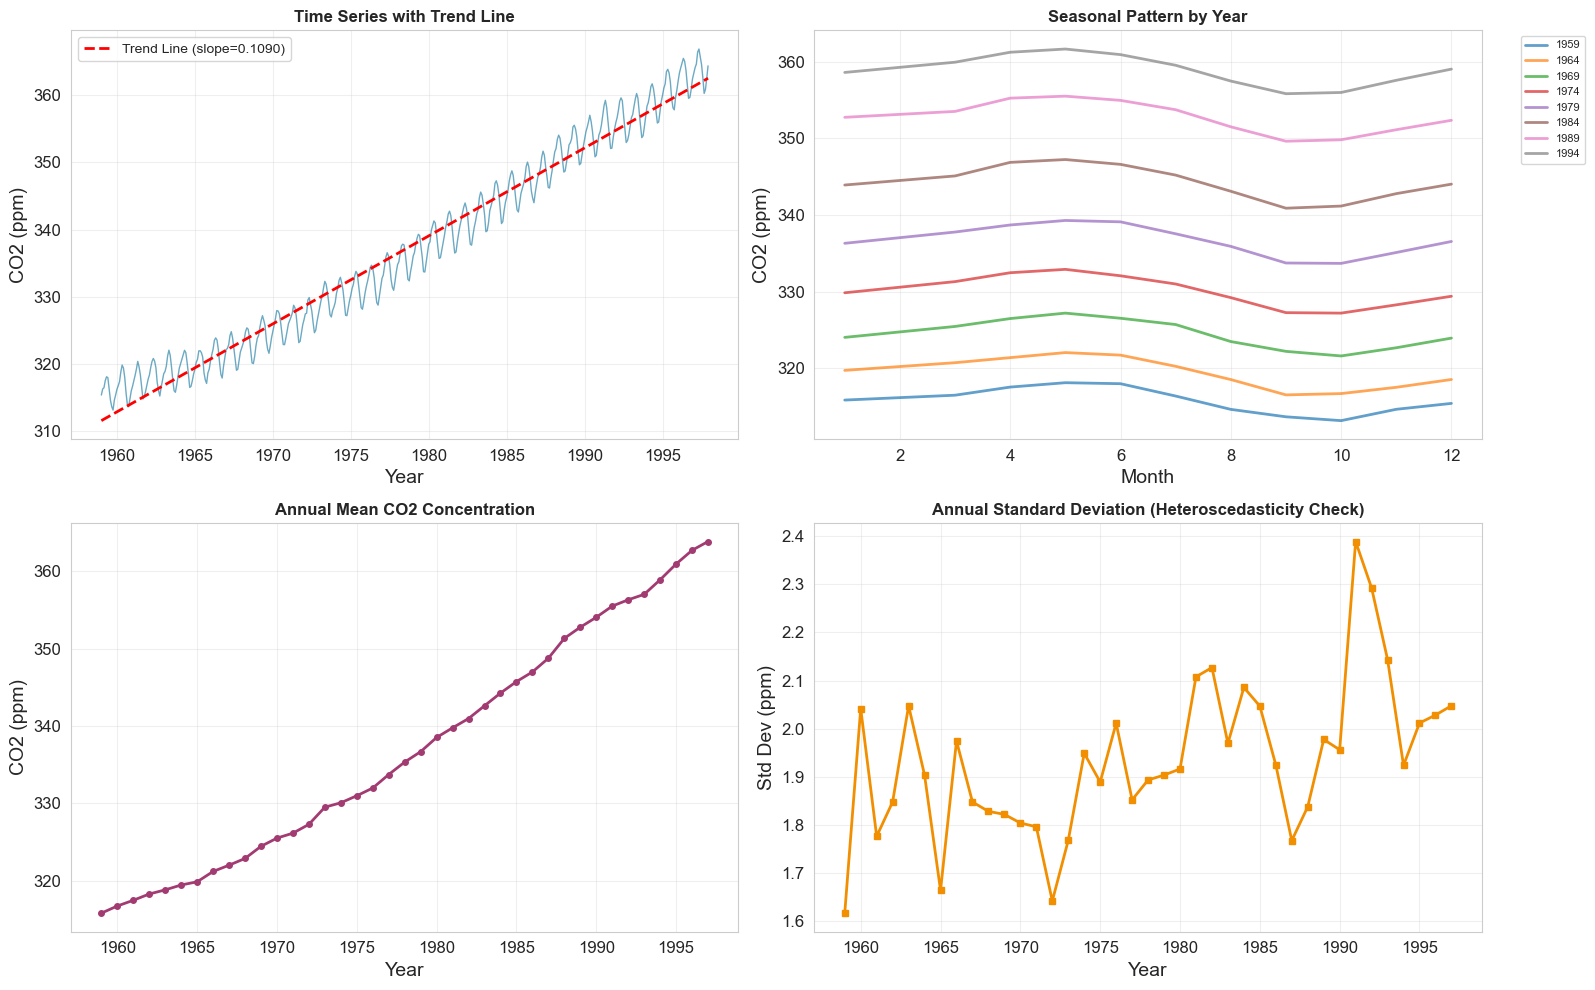

In [27]:
# detailed analysis plots 
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# subplot 1: Time Series with Trend Line and Seasonality
# main time series plot

axes[0, 0].plot(df.index, df['co2'], linewidth=1, color='#2E86AB', alpha=0.7)
# add trend line 
z = np.polyfit(range(len(df)), df['co2'].values, 1)
p = np.poly1d(z)
axes[0, 0].plot(df.index, p(range(len(df))), "r--", 
                linewidth=2, label=f'Trend Line (slope={z[0]:.4f})')
axes[0, 0].set_title('Time Series with Trend Line', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Year')
axes[0, 0].set_ylabel('CO2 (ppm)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# subplot 2: Seasonal Pattern by Year 
df['year'] = df.index.year
df['month'] = df.index.month
yearly_pivot = df.pivot_table(values='co2', index='month', columns='year')
for year in yearly_pivot.columns[::5]:  # plot every 5th year for clarity
    axes[0, 1].plot(yearly_pivot.index, yearly_pivot[year], 
                    label=str(year), alpha=0.7)
axes[0, 1].set_title('Seasonal Pattern by Year', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Month')
axes[0, 1].set_ylabel('CO2 (ppm)')
axes[0, 1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
axes[0, 1].grid(True, alpha=0.3)

# subplot 3: yearly mean concentration
yearly_mean = df.groupby('year')['co2'].mean()
axes[1, 0].plot(yearly_mean.index, yearly_mean.values, 
                marker='o', linewidth=2, markersize=4, color='#A23B72')
axes[1, 0].set_title('Annual Mean CO2 Concentration', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('CO2 (ppm)')
axes[1, 0].grid(True, alpha=0.3)

# subplot 4: yearly std deviation (heteroscedasticity check)
monthly_std = df.groupby('year')['co2'].std()
axes[1, 1].plot(monthly_std.index, monthly_std.values, 
                marker='s', linewidth=2, markersize=4, color='#F18F01')
axes[1, 1].set_title('Annual Standard Deviation (Heteroscedasticity Check)', 
                     fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Year')
axes[1, 1].set_ylabel('Std Dev (ppm)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('task1_co2_detailed_analysis.png', dpi=300, bbox_inches='tight')
plt.savefig('/Users/lihong/Desktop/ats_proj_submit_code/result_plot/detailed_analysis.png')
plt.show()

In [28]:
# ========== 5. Statistical Summary ==========
print("\n" + "="*60)
print("Statistical Summary")
print("="*60)
print(f"\nDescriptive Statistics of CO2 Concentration:")
print(df['co2'].describe())

print(f"\nTrend Analysis:")
print(f"  - Linear Trend Slope: {z[0]:.4f} ppm/month")
print(f"  - Annual Growth Rate: {z[0]*12:.4f} ppm/year")
print(f"  - Total Increase: {df['co2'].iloc[-1] - df['co2'].iloc[0]:.2f} ppm")
print(f"  - Percentage Increase: {((df['co2'].iloc[-1] - df['co2'].iloc[0]) / df['co2'].iloc[0] * 100):.2f}%")

print(f"\nSeasonal Fluctuations:")
monthly_avg = df.groupby('month')['co2'].mean()
print(f"  - Maximum Monthly Average: {monthly_avg.max():.2f} ppm (Month: {monthly_avg.idxmax()})")
print(f"  - Minimum Monthly Average: {monthly_avg.min():.2f} ppm (Month: {monthly_avg.idxmin()})")
print(f"  - Amplitude of Seasonal Variation: {monthly_avg.max() - monthly_avg.min():.2f} ppm")

print(f"\nHeteroscedasticity Check:")
print(f"  - Range of Standard Deviation over Time: {monthly_std.min():.4f} - {monthly_std.max():.4f}")
print(f"  - Variation Ratio of Standard Deviation: {monthly_std.max()/monthly_std.min():.2f}x")



Statistical Summary

Descriptive Statistics of CO2 Concentration:
count    468.000000
mean     337.053526
std       14.966220
min      313.180000
25%      323.530000
50%      335.170000
75%      350.255000
max      366.840000
Name: co2, dtype: float64

Trend Analysis:
  - Linear Trend Slope: 0.1090 ppm/month
  - Annual Growth Rate: 1.3075 ppm/year
  - Total Increase: 48.92 ppm
  - Percentage Increase: 15.51%

Seasonal Fluctuations:
  - Maximum Monthly Average: 339.88 ppm (Month: 5)
  - Minimum Monthly Average: 334.17 ppm (Month: 10)
  - Amplitude of Seasonal Variation: 5.71 ppm

Heteroscedasticity Check:
  - Range of Standard Deviation over Time: 1.6158 - 2.3894
  - Variation Ratio of Standard Deviation: 1.48x
